In [87]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [88]:
#  константы генетического алгоритма
POPULATION_SIZE = 600   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

RANDOM_SEED = 74
random.seed(RANDOM_SEED)


14


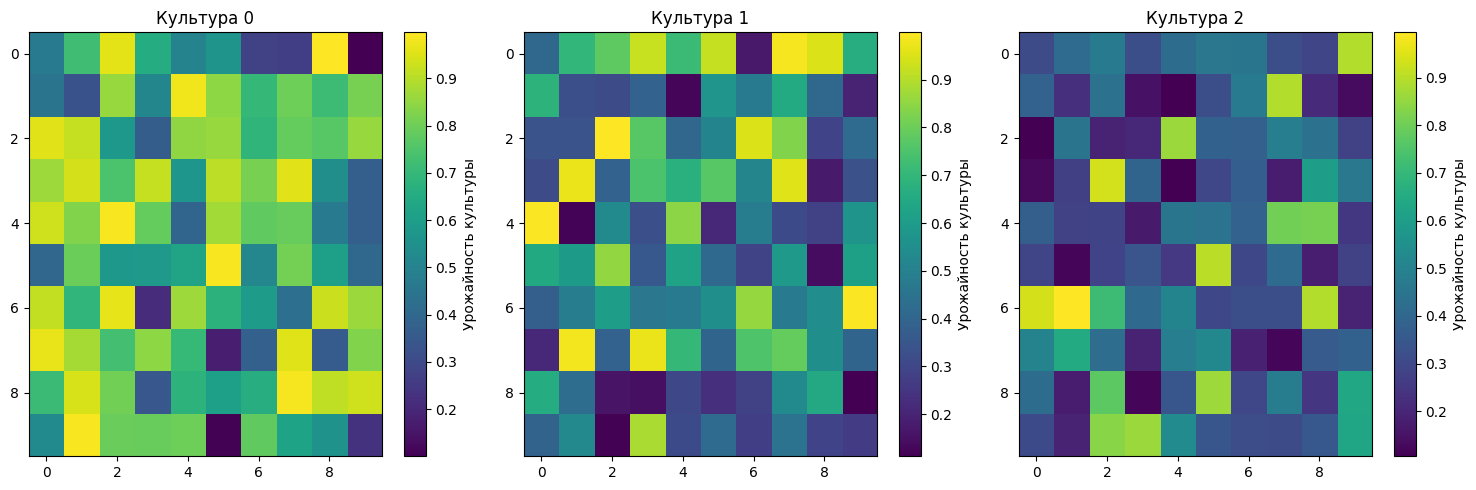

In [89]:
COUNT_CULTURES = 3

ROWS_COUNT_POLYGONS = 10
COULUMNS_COUNT_POLYGONS = 10
COUNT_POLYGONS = ROWS_COUNT_POLYGONS * COULUMNS_COUNT_POLYGONS  

MATRICES_CULTURES = []

# Вероятности для каждой культуры
P_CORP = [random.uniform(0.1, 0.9) for _ in range(COUNT_CULTURES)]
# Стоимость культур
COSTS_CULTURES = [random.randint(5, 25) for _ in range(COUNT_CULTURES)]    # тыс. руб.
print(max(COSTS_CULTURES))

# Характеристика культур на поле
for i in range(COUNT_CULTURES):
    MATRICES_CULTURES.append([
        random.uniform(0.5, 1.0) if random.random() < P_CORP[i] else random.uniform(0.1, 0.5)
        for j in range(COUNT_POLYGONS)  # Используем переменную j для внутреннего цикла
    ])

# количество строк и столбцов для сетки
num_columns = 3  # Максимум 3 графика в ряду
num_graphs = COUNT_CULTURES
num_rows = (num_graphs + num_columns - 1) // num_columns  # Высчитывание строк

# Визуализация
plt.figure(figsize=(15, 5 * num_rows))  #  размеры фигуры для нескольких строк

for i in range(COUNT_CULTURES):
    # Преобразование одномерного массива в матрицу (2D массив) для отображения
    matrix_for_schema = np.reshape(MATRICES_CULTURES[i], (ROWS_COUNT_POLYGONS, COULUMNS_COUNT_POLYGONS))
    
    plt.subplot(num_rows, num_columns, i + 1)  # место каждого графика в сетке
    plt.imshow(matrix_for_schema, cmap='viridis', aspect='auto')  # Визуализация двумерного массива

    plt.title(f"Культура {i}")
    plt.colorbar(label='Урожайность культуры')

plt.tight_layout()  # Чтобы графики и подписи не пересекались
plt.show()

In [90]:
class FitnessMax():
    def __init__(self):
        self.values = [0]

# класс для представления каждого индивидуума в популяции
class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()

# # Функция принадлежности, которая определяет приспособленность отдельной особи
# def oneMaxFitness(individual):
#     return sum(MATRICES_CULTURES[individual[i]][i] for i in range(COUNT_POLYGONS)),

# Функция приспособленности, которая определяет "качество" (приспособленность) отдельной особи
# def oneMaxFitness(individual):
#     total_fitness = 0
    
#     # Пройдем по каждому полигону (индексу)
#     for i in range(COUNT_POLYGONS):
#         culture_index = individual[i]  # Индекс выбранной культуры для данного полигона
#         coef_culture_value = MATRICES_CULTURES[culture_index][i] / max([MATRICES_CULTURES[x][i] for x in range(COUNT_CULTURES)])  # Урожайность культуры на полигоне
#         coef_culture_cost = COSTS_CULTURES[culture_index] / min([COSTS_CULTURES[x] for x in range(COUNT_CULTURES)])  # Стоимость культуры

#         if coef_culture_cost > 0: 
#             combined_value = coef_culture_value / coef_culture_cost 
#         else:
#             combined_value = coef_culture_value
        
#         total_fitness += combined_value 
#     total_fitness /= COUNT_POLYGONS / 100

#     return total_fitness, 

# Компактная версия функции приспособленности
def oneMaxFitness(individual):
    total_fitness = sum(
        (MATRICES_CULTURES[individual[i]][i] / max(MATRICES_CULTURES[x][i] for x in range(COUNT_CULTURES))) /
        (COSTS_CULTURES[individual[i]] / min(COSTS_CULTURES) if COSTS_CULTURES[individual[i]] > 0 else 1)
        for i in range(COUNT_POLYGONS)
    )
    
    return total_fitness / (COUNT_POLYGONS / 100),


# создание индивидуума
def individualCreator():
    return Individual([random.randint(0, COUNT_CULTURES-1) for i in range(COUNT_POLYGONS)])
# создание популяции индивидуумов
def populationCreator(n = 0):
    return list([individualCreator() for i in range(n)])


In [91]:
population = populationCreator(n=POPULATION_SIZE)
generationCounter = 0

# вычление приспобленности каждой особи с помощью map, map - выполняет oneMaxFitness для каждого особи
fitnessValues = list(map(oneMaxFitness, population))

# присвоение вычисленных значения для индивидуумов
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

maxFitnessValues = []
meanFitnessValues = []


In [92]:
# фнукция клонирования отдельного индивидуума. после отбора клонируется каждый индивидуум
def clone(value):
    ind = Individual(value[:])
    ind.fitness.values[0] = value.fitness.values[0]
    return ind

# функция турнирного отбора
def selTournament(population, p_len):
    offspring = []  # новый список из отобранных особей
    for n in range(p_len):
        i1 = i2 = i3 = 0
        while i1 == i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), random.randint(0, p_len-1) # случайным образом отбирает 3 особи

        offspring.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values)) # параметр key с функцией lamda отбирает особь с максимальной приспособленностью

    return offspring

# 1. одноточный кроссенгровер
def cxOnePoint(child1, child2):
    s = random.randint(2, len(child1)-3)
    child1[s:], child2[s:] = child2[s:], child1[s:]

# 2. кросенгровер смешиванием, вариант 2
def cxMix(child1, child2):
    s = [*child1, *child2]

    random.shuffle(s)
    half = len(s) // 2

    child1 = s[:half]
    child2 = s[half:]

# 3. кросенгровер с двумя точками разрыва
def cxTwicePoint(child1, child2):
    s1 = random.randint(2, len(child1) // 2)
    child1[s1:], child2[s1:] = child2[s1:], child1[s1:]
    s2 = random.randint(len(child1) // 2, len(child1)-3)
    child1[s2:], child2[s2:] = child2[s2:], child1[s2:]

# 1. мутация
def mutFlip(mutant, indpb=0.01):
    for indx in range(len(mutant)):
        if random.random() < indpb:
            rand_mutation = mutant[indx]
            while rand_mutation == mutant[indx]:
                rand_mutation = random.randint(0, COUNT_CULTURES - 1)

# 2. мутация разворота фрагмента
def mutReverse(mutant, indpb=0.01):
    s = random.randint(0, len(mutant) - 4)
    s_mutation = [mutant[s], mutant[s+1], mutant[s+2]]
    s_mutation.reverse()
    mutant[s], mutant[s+2] = s_mutation[0], s_mutation[2]

# 3. мутация перестановки двух геной
def mutSwap(mutant, indpb=0.01):
    s1 = random.randint(0, len(mutant) - 1)
    s2 = s1
    while(s2 == s1):
        s2 = random.randint(0, len(mutant) - 1)
    
    mutant[s1], mutant[s2] = mutant[s2], mutant[s1]

Поколение 1: Макс. приспособ. = 66.1492377311868, Ср. приспособ. = 58.584502418543316
Лучший индивидуум =  0 0 0 2 1 1 2 1 0 1 0 2 0 2 1 0 0 0 0 0 2 0 0 1 0 0 2 1 1 2 2 1 0 1 0 0 0 1 2 1 0 1 0 1 2 0 0 2 1 1 2 0 1 0 1 0 0 1 0 1 0 0 1 1 2 1 1 0 0 1 2 0 0 0 2 1 0 1 0 0 2 2 2 0 0 2 1 1 0 0 1 1 0 2 0 2 2 2 1 0 

Поколение 2: Макс. приспособ. = 67.71875532697368, Ср. приспособ. = 60.79597488811451
Лучший индивидуум =  1 2 0 0 0 0 2 1 0 0 1 0 2 0 1 0 0 2 0 0 0 0 0 0 0 1 0 2 2 0 0 0 0 2 0 0 2 0 2 2 1 1 0 0 0 2 1 2 2 2 1 2 1 1 1 0 0 0 2 0 2 2 1 1 1 0 0 2 2 0 0 2 1 0 0 1 1 0 1 0 2 2 0 0 0 1 0 0 2 2 1 2 2 1 0 2 1 1 0 2 

Поколение 3: Макс. приспособ. = 68.67382844679564, Ср. приспособ. = 62.67419371211934
Лучший индивидуум =  0 0 0 0 2 2 2 2 2 2 1 1 2 1 2 0 0 2 1 0 0 2 2 0 2 2 0 0 0 1 0 1 2 0 2 0 0 0 0 0 0 0 1 0 2 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 2 2 1 2 1 0 0 0 2 0 2 0 0 2 0 2 0 0 2 1 1 2 1 0 0 0 0 0 2 2 2 1 2 2 0 0 0 0 0 1 

Поколение 4: Макс. приспособ. = 70.78811201983889, Ср. приспособ. = 64.34

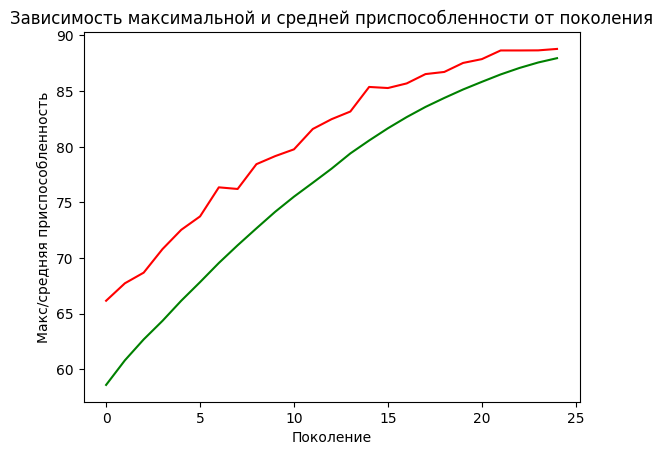

In [93]:
fitnessValues = [individual.fitness.values[0] for individual in population]

#while max(fitnessValues) < COUNT_POLYGONS and generationCounter < MAX_GENERATIONS:
while max(fitnessValues) < 100 and generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population))
    offspring = list(map(clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            cxOnePoint(child1, child2)
            # cxMix(child1, child2)
            # cxTwicePoint(child1, child2)

    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutFlip(mutant, indpb=1.0/COUNT_POLYGONS)
            # mutReverse(mutant, indpb=1.0/COUNT_POLYGONS)
            # mutSwap(mutant, indpb=1.0/COUNT_POLYGONS)

    freshFitnessValues = list(map(oneMaxFitness, offspring))
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue

    population[:] = offspring
    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues)/len(population)

    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)

    print(f'Поколение {generationCounter}: Макс. приспособ. = {maxFitness}, Ср. приспособ. = {meanFitness}')
    best_index = fitnessValues.index(max(fitnessValues))
    print("Лучший индивидуум = ", *population[best_index], "\n")

plt.plot(maxFitnessValues, color="red")
plt.plot(meanFitnessValues, color="green")
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title("Зависимость максимальной и средней приспособленности от поколения")
plt.show()

(88.78019761984797,)


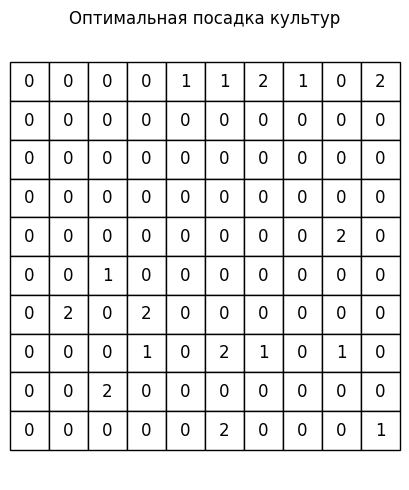

In [94]:
bestOfAll = max(population, key=lambda ind: ind.fitness.values) # Лучший индивид

print(bestOfAll.fitness.values)

# одномерный массив в матрицу (2D массив) для отображения
matrix_for_schema = np.reshape(bestOfAll, (ROWS_COUNT_POLYGONS, COULUMNS_COUNT_POLYGONS))

plt.figure(figsize=(ROWS_COUNT_POLYGONS, COULUMNS_COUNT_POLYGONS/2))  # Размер графика

# без цветовой раскраски
table = plt.table(cellText=matrix_for_schema, cellLoc='center', loc='center')

table.scale(2, 2) 
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.axis('off')

plt.title("Оптимальная посадка культур")

plt.tight_layout()  # Чтобы графики и подписи не пересекались
plt.show()
